# Assignment1
2021021581 임진하<br>
2021021699 이유원<br>
2021011207 박지훈

## Part1

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

In [2]:
# calculate the gradient of the function and update parameters
def gradient(x, y, w, b, lr):
    # calculate the gradient
    grad_w = 0
    grad_b = 0
    for i in range(len(x)):
        grad_w += -2 * x[i] * (y[i] - (w * x[i] + b))
        grad_b += -2 * (y[i] - (w * x[i] + b))

    # update parameters
    w -= lr * grad_w
    b -= lr * grad_b
    return w, b

In [3]:
# Define funtion that plot loss function
def plot_loss(loss_history):
    time.sleep(0.01)
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [4]:
# Define the function that plot a suface plot of the loss surface
def plot_surface(loss_history):
    time.sleep(0.01)
    # Create a meshgrid
    w1 = np.linspace(-10, 10, 100)
    w2 = np.linspace(-10, 10, 100)
    W1, W2 = np.meshgrid(w1, w2)
    # Compute the loss function on the meshgrid
    Z = np.zeros((len(w1), len(w2)))
    for i in range(len(w1)):
        for j in range(len(w2)):
            Z[i, j] = np.sum((np.array([w1[i], w2[j]]).dot(X) - Y)**2)
    # Plot the loss surface
    plt.contourf(W1, W2, Z, 100)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.colorbar()
    # Plot the trajectory of the gradient descent
    w1 = [h[0] for h in loss_history]
    w2 = [h[1] for h in loss_history]
    plt.plot(w1, w2, 'r-')
    plt.show()

In [5]:
# Define the funcion of 2D gradient algorithm
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-3, online_loss_plot=False, online_surf_plot=False):
    # Initialize the parameters
    w = initial[0]
    b = initial[1]
    loss_history = []
    # Start the iteration
    for i in range(max_iter):
        # Calculate the loss
        y_hat = np.dot(X, w) + b
        # loss = np.sum((y_hat - Y)**2) / X.shape[0]
        loss = np.mean(np.square(y_hat - Y))
        loss_history.append(loss)
        # Plot the loss function
        if online_loss_plot:
            plot_loss(loss_history)
        # Plot the loss surface
        if online_surf_plot:
            plot_surface(loss_history)
        # Calculate the gradient and update the parameters
        w, b = gradient(X, Y, w, b, learning_rate)
        # Stop the iteration if the loss is small
        if loss < stop_tolerance:
            break
    return w, b

## Part2

In [6]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
print(data.shape)
X = data[:, 0]
Y = data[:, 1]

(100, 2)


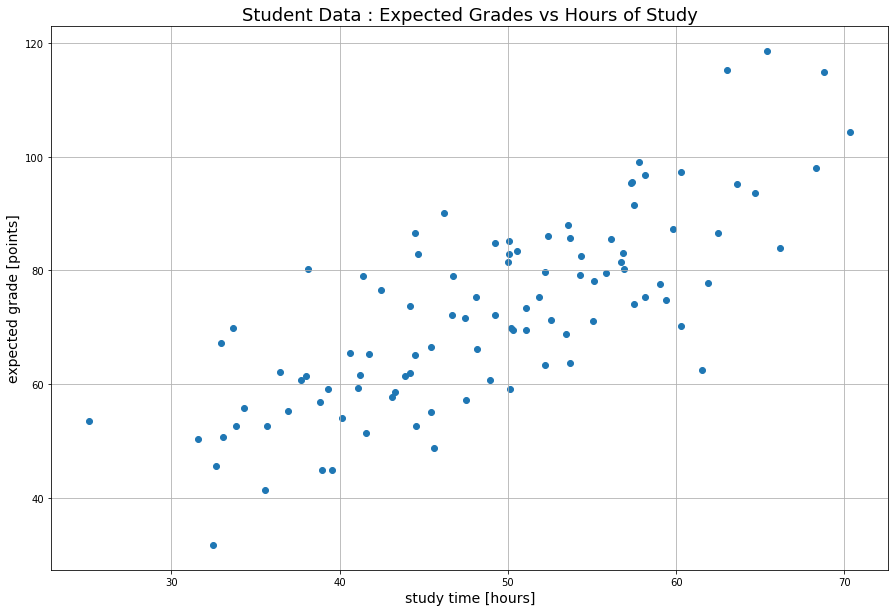

In [7]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X, Y)
plt.title('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

In [8]:
input_cnt = 1 
output_cnt = 1

In [9]:
np.random.seed(119)
init_weight = np.random.normal(0,1, [input_cnt, output_cnt])
init_bias = np.zeros([output_cnt])

In [10]:
# initial = [init_weight, init_bias]
initial = [0, 0]

In [11]:
weight, bias = gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-3, online_loss_plot=False, online_surf_plot=False)

/tmp/ipykernel_9982/464973019.py:12: RuntimeWarning: overflow encountered in square
  loss = np.mean(np.square(y_hat - Y))


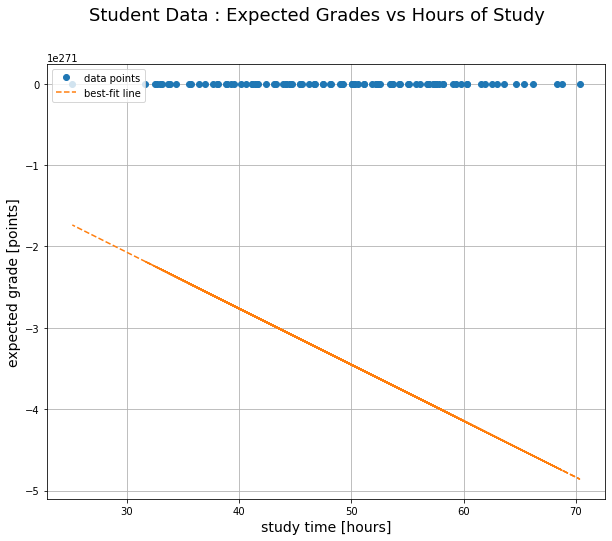

In [12]:
fig = plt.figure(figsize=(10,8))

y_hat = [weight * x_i + bias for x_i in X]

# plot data and best-fit lines
plt.plot(X, Y, 'o', X, y_hat, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()